# Tutorial about statistical methods
The following contains a sequence of simple exercises, designed to get familiar with using Minuit for maximum likelihood fits and emcee to determine parameters by MCMC. Commands are generally commented, i.e. in order to activate them, simply uncomment them. A few functions are still to be defined... which is part of the exercise. Have fun!

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Generate a dataset to be fitted 

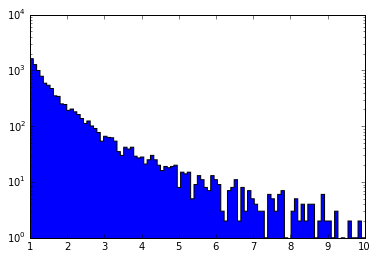

In [2]:
np.random.seed(12345)
y = np.random.random(10000)
x = 1./np.sqrt(y)
plt.hist(x, bins=100, range=(1,10), histtype='stepfilled',color='blue')
plt.yscale('log')

## Maximum likelihood fit of a simple power law
First define the negative-log likelihood function for a density proportional to x**(-a) the range 1 < x < infinity

In [3]:
def nllp(a):
    return np.sum(a*np.log(x) - np.log(a-1))

Then minimize it using iminuit

In [5]:
import iminuit

In [6]:
minp = iminuit.Minuit(nllp, a=3, error_a=0.1, errordef=0.5)

In [8]:
minp.migrad();

FCN = 7888.70469829 
 TOTAL NCALL = 29 
 NCALLS = 11 
 
 
 EDM = 2.39178870231e-10 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,a,3.02417,0.0202417,0,0,,,


## Error analysis
First determine the parabolic errors using hesse() and then do a parameter scan using minos() to determine the 68% confidence level errors.

In [9]:
minp.hesse();

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,a,3.02417,0.0202417,0,0,,,


+,a
a,1.00


Error,-0.0201738617587,0.0203091857502
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


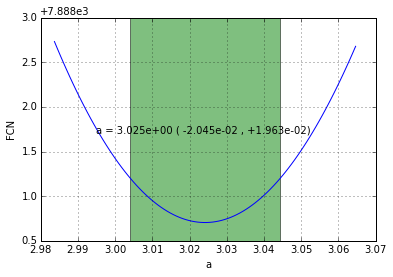

In [10]:
minp.minos();
minp.draw_profile('a');

## Use of an un-normalised PDF 
The above example shall be modified such that the normalisation of the likelihood function, which so far was determined analytically, now is determined numerically in the fit. This is the more realistic case, since in many case no (simple) analytical normalisation exists. As a first step, this requires to load the integration package.   

In [11]:
from scipy.integrate import quad

In [12]:
def pdfpn(x, a):
    return x**(-a)
def pdfpn_norm(a):
    return quad(pdfpn, 1, np.inf, args=(a))[0] 
def nllpn(a):
    return -np.sum(np.log(pdfpn(x,a))) + np.log(pdfpn_norm(a))*len(x) 

Then do the same minimization steps as before.

In [13]:
minpn = iminuit.Minuit(nllpn, a=3, error_a=0.1, errordef=0.5)

In [14]:
minpn.migrad();

FCN = 7888.70469776 
 TOTAL NCALL = 18 
 NCALLS = 18 
 
 
 EDM = 1.2507327863e-08 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,a,3.02417,0.0202402,0,0,,,


## Extend the fit model by an exponential cutoff
The exponential cutoff is implemented by exp(-b*b*x), i.e. exponential growth is not allowed for real valued parameters b. The implications of this ansatz shall be discussed when looking at the solution. After that, the example can be modified to use exp(-b*x). 

Here the likelihood function has no (simple) analytical normalisation anymore, i.e. we directly do the numerical approach.

In [15]:
def pdfcn(x, a, b):
    return x**(-a)*np.exp(-b*b*x)
def pdfcn_norm(a, b):
    return quad(pdfcn, 1, np.inf, args=(a, b))[0] 
def nllcn(a, b):
    return -np.sum(np.log(pdfcn(x,a,b))) + np.log(pdfcn_norm(a,b))*len(x) 

As before, use Minuit for minimisation and error analysis, but now in two dimensions. Study parabolic errors and minos errors, the latter both for the single variables and for both together.

In [16]:
mincn = iminuit.Minuit(nllcn, a=3, b=1, error_a=0.1, error_b=0.1, errordef=0.5)

In [17]:
mincn.migrad();

FCN = 7887.87601212 
 TOTAL NCALL = 85 
 NCALLS = 85 
 
 
 EDM = 1.54019145338e-06 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,a,2.99501,0.0285219,0,0,,,
2,b,0.0895059,0.0316701,0,0,,,


In [18]:
mincn.hesse();

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,a,2.99501,0.0282245,0,0,,,
2,b,0.0895059,0.0309978,0,0,,,


+,a,b
a,1.00,-0.69
b,-0.69,1.00


In [19]:
mincn.minos();

Error,-0.0326062951032,0.031209848349
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0500402203176,0.0350458653407
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


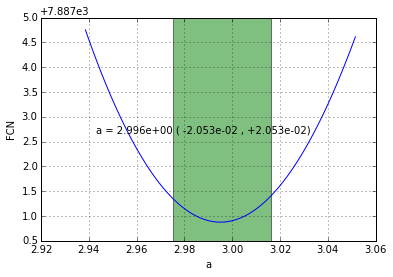

In [20]:
mincn.draw_profile('a');

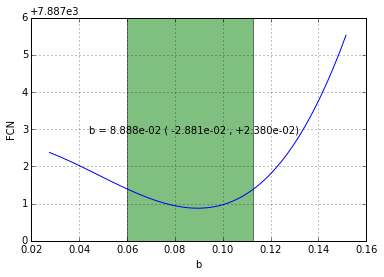

In [21]:
mincn.draw_profile('b');

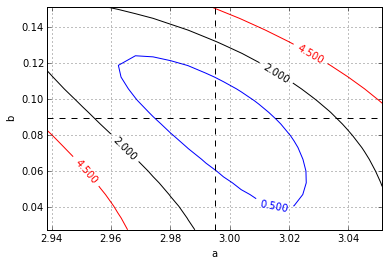

In [23]:
mincn.draw_contour('a','b');

## Do the same analysis by MCMC

In [24]:
import emcee

emcee requires as input the log-likelihood of the posterior in the parameters a and b. In the following it is composed of the log-of the prior and the log-likelihood of the data. Initially use a simple uniform prior in a and b with the constraint b>0. Afterwards one can play with the prior to see how strongly it affects the result.  

In [25]:
def log_prior(theta):
    a, b = theta
    if b < 0:
        return -np.inf  # log(0)
    else:
        return  0.

def log_likelihood(theta, x):
    a, b = theta
    return np.sum(-a*np.log(x) - b*b*x)

def log_posterior(theta, x):
    a , b = theta
    return log_prior(theta) + log_likelihood(theta, x) - np.log(pdfcn_norm(a,b))*len(x)  

Here we'll set up the computation. emcee combines multiple "walkers", each of which is its own MCMC chain. The number of trace results will be nwalkers * nsteps

In [26]:
ndim     = 2     # number of parameters in the model
nwalkers = 50    # number of MCMC walkers
nburn    = 100   # "burn-in" period to let chains stabilize
nsteps   = 1000  # number of MCMC steps to take

# random starting point
np.random.seed(0)
starting_guesses = np.random.random((nwalkers, ndim))


run the MCMC (and time it using IPython's %time magic

In [28]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[x])
%time sampler.run_mcmc(starting_guesses, nsteps)
print("done")

CPU times: user 33 s, sys: 35 ms, total: 33 s
Wall time: 33 s
done


sampler.chain is of shape (nwalkers, nsteps, ndim). Before analysis throw-out the burn-in points and reshape.

In [29]:
emcee_trace = sampler.chain[:, nburn:, :].reshape(-1, ndim).T
len(emcee_trace[0])

45000

Analyse the results. Plot the projected (marginalized) posteriors for the parameters a and b and also the joinyt density as sampled by the MCMC.

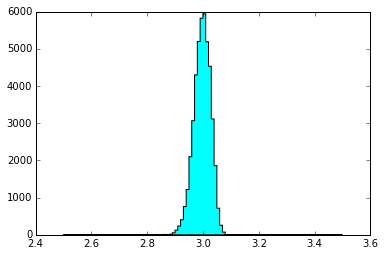

In [31]:
plt.hist(emcee_trace[0], 100, range=(2.5,3.5) , histtype='stepfilled', color='cyan');

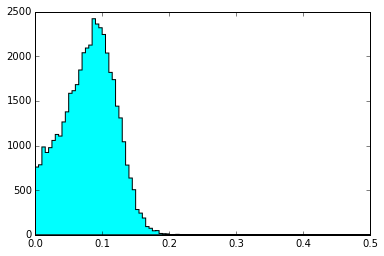

In [33]:
plt.hist(emcee_trace[1], 100, range=(0.,0.5) , histtype='stepfilled', color='cyan');

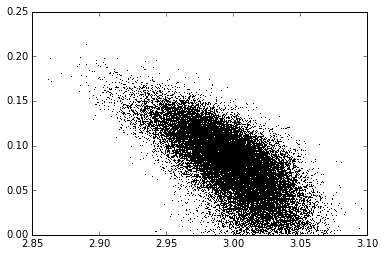

In [34]:
plt.plot(emcee_trace[0],emcee_trace[1],',k');

As a final step, generate 2-dim bayesian confidence level contours containing 68.3% and 95.5% probability content. For that define a convenient plot functions and use them. Overlay the contours with the scatter plot.

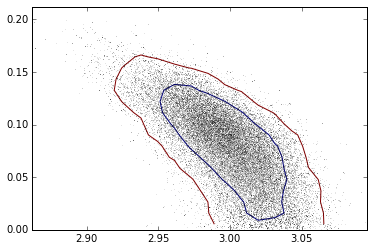

In [35]:
def compute_sigma_level(trace1, trace2, nbins=20):
    """From a set of traces, bin by number of standard deviations"""
    L, xbins, ybins = np.histogram2d(trace1, trace2, nbins)
    L[L == 0] = 1E-16
    logL = np.log(L)

    shape = L.shape
    L = L.ravel()

    # obtain the indices to sort and unsort the flattened array
    i_sort = np.argsort(L)[::-1]
    i_unsort = np.argsort(i_sort)

    L_cumsum = L[i_sort].cumsum()
    L_cumsum /= L_cumsum[-1]
    
    xbins = 0.5 * (xbins[1:] + xbins[:-1])
    ybins = 0.5 * (ybins[1:] + ybins[:-1])

    return xbins, ybins, L_cumsum[i_unsort].reshape(shape)


xbins, ybins, sigma = compute_sigma_level(emcee_trace[0], emcee_trace[1])
plt.contour(xbins, ybins, sigma.T, levels=[0.683, 0.955])
plt.plot(emcee_trace[0], emcee_trace[1], ',k', alpha=0.1)